# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning & data science
libraries in an attempt to build a ML model capable of predicting whether or not
someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition - what problem are we trying to solve?
2. Data - what data do we have?
3. Evaluation - what defines success?
4. Features - what features should we model?
5. Modelling - what kind of model should we use?
6. Experimentation - what have we tried/what else can we try?

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart
disease?

## 2. Data

The original data came from Cleveland data from the UCI ML repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease
during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age
* sex - (1 = male; 0 = female)
* cp - chest pain type (4 values)
    * 0: Typical angina: Chest pain related decrease blood supply to the heart
    * 1: Atypical angina: Chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: Chest pain not showing signs of disease
* trestbps - resting blood pressure
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg - resting electrocardiographic results (values 0,1,2)
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result 3 = normal; 6 = fixed defect; 7 = reversable defect
* target- have heart disease or not (1=yes; or 0=no)

## Preparing the tools (Import tools as you need it*)

we're going to user Pandas, NumPy and Matplotlib for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the
dataset you're working with.

1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat differnt types?
3. whats missing from the data adn how do you deal with it?
4. where are the outliers (values/samples) and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

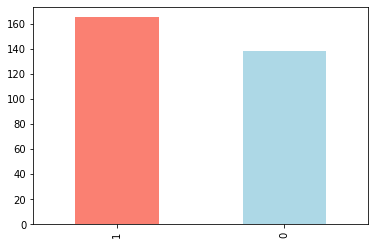

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

compare different columns to each other that relate to the target variable

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


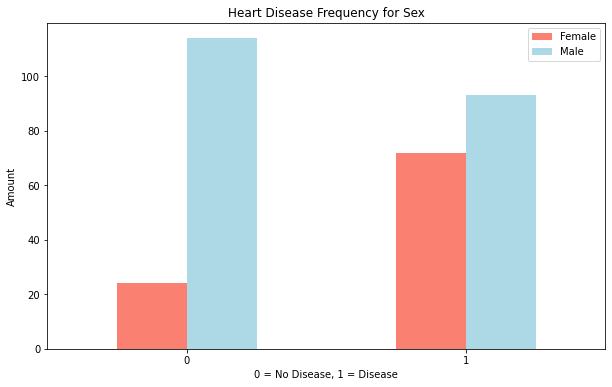

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

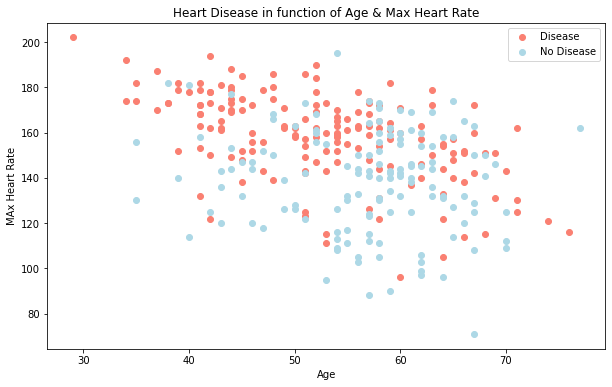

In [13]:
# create another figure
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age & Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('MAx Heart Rate')
plt.legend(['Disease', 'No Disease']);

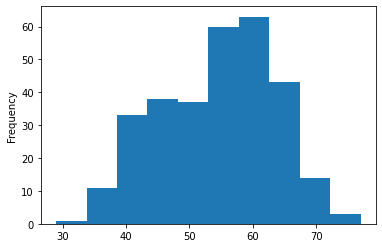

In [14]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

* cp - chest pain type (4 values)
    * 0: Typical angina: Chest pain related decrease blood supply to the heart
    * 1: Atypical angina: Chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: Chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


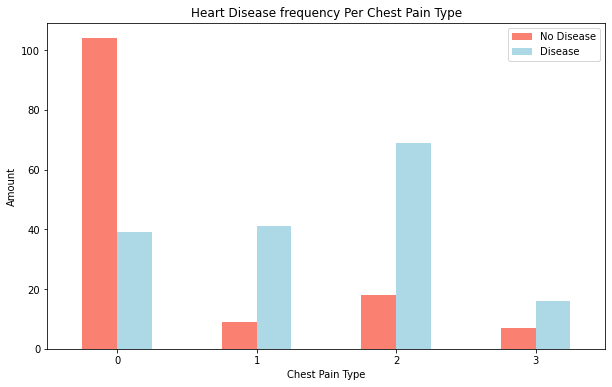

In [16]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10, 6),
                                  color=['salmon', 'lightblue'])

# add some communication
plt.title('Heart Disease frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Building a Correlation Matrix 
* big table of numbers telling us how each independent variable is related to each other.

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


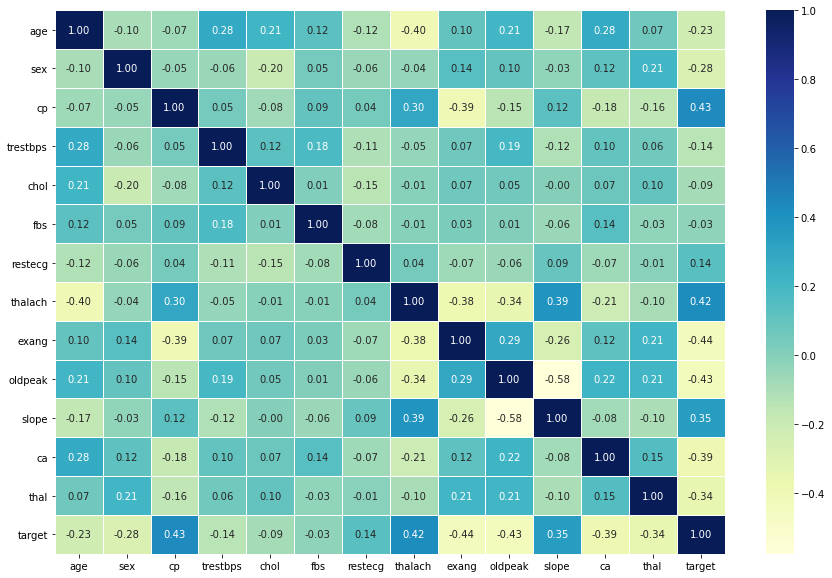

In [19]:
# lets make our correlation matrix more visual using seaborn's heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

#### this correlation matrix is showing us how Chest Pain is related to the target column
#### Tidbit:
* a higher positive value means a potential positive correlation
* a higher negative value means a potential negative correlation (relationship between 2 variables in which 1 variab;e increases as the other decreases)/decrease

**as CP (Chest pain) goes up, the target value also increases**

### exang - if someone gets chest pain during exercise (exang = 1) their chance of having heart disease goes down (target = 0)

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into X & y
X = df.drop('target', axis=1)

y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# split data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

now we've got our data split into training and test sets
its time to build a ML model

we'll train it (find the patterns) on the training set

We'll test it (use the patterns) on the test set

**We're going to try 3 diff. ML models:**
1. Logistic Regression
2. K-Nearest Classifier
3. Random Forest Classifier

In [27]:
# put models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fit and evaluate given ML models.
    models: a dict of differnt scikit-learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(42)
# make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
# fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/Users/artonmirakaj/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

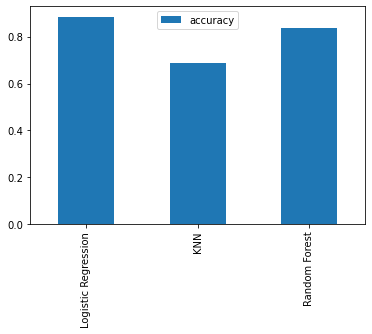

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Note: 
* we want an evaluation of 95% accuracy
* right now we have a model (Logistic Regression) that performed better than any other model
* we want to tune the hyperparameters of the LogReg model to increase the accuracy

Now we've got a baseline model
and we know that a models first predictions arent always what we
should base our next steps off.
What should we do?

**Lets look at the following:**
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC curve
10. Area under the curve (AUC)

# HyperParameter Tuning

### Lets tune KNN by hand

In [30]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# lop through differnt n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


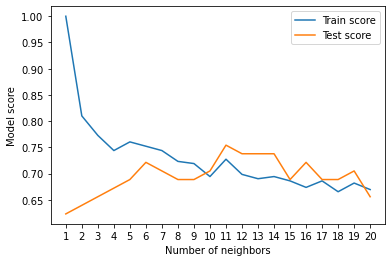

In [33]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

In [34]:
# our KNN went from 68% to 75% from tuning
# we'll disregard this model for now

## Hyperparameter tuning with RandomizedSearchCV (cross-validation)

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

### LogisticRegression Hyperparamter Tuning

In [35]:
# create a hyperparameter grid for LogisticRegression
# tune these hyperparameters for logisticRegression (C, solver)

log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# create hyperparameter grid for RandomForestClassifier
# tune these hyperparameters for RandomForestClassifier 
# (n_estimators, max_depth, min_samples_split, min_samples_leaf)
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [36]:
# tune LogisticRegression

np.random.seed(42)

# setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
# lets check to see what are the best parameters to tune with
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
# lets evaluate it on our test data
rs_log_reg.score(X_test, y_test)

# it stayed the same as 88.5%

0.8852459016393442

### RandomForestClassifier Hyperparamter Tuning

In [39]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# fit random hyperparameter seach model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
# lets check to see what are the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

Based on Tuning the hyperparameters for RandomForestClassifier
it went from 83.6% to 86.8%

#### The process of elimination

**Logistic Regression**
* Original baseline evaluation = 88.5%
* Hyperparameter Tuning Evaluation = 88.5%

**KNN**
* Original baseline evaluation = 68.8%
* Hyperparameter Tuning Evaluation = 75.4%

**Random Forest Classifier**
* Original baseline evaluation = 83.6%
* Hyperparameter Tuning Evaluation = 86.8%

### Hyperparameter tuning with GridSarchCV

Our LogisticRegression model provides the best score, so far,
we'll try and improve the hyperparameters again with GridSearchCV

In [42]:
# Different Hyperparamters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparmater search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
# check best hyperparamters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
# evaluate grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Subsequentially, our LogisticRegression model got the same score as our baseline
(its done very well)

### Note:

We are moving forward now with our LogisticRegression Model
using the Hyperparameters from the GridSearchCV
to evaluate the rest of model's metrics

### Evaluating our tuned ML Classifier, beyond accuracy

* ROC curve
* AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation can be used where possible.


To make comprisons and evaluate our trained model, first we need to make predictions

In [45]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [46]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

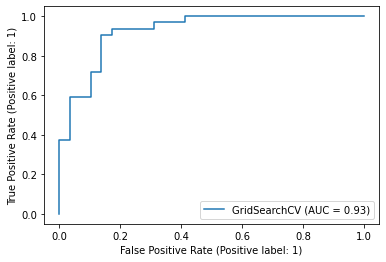

In [48]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [52]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


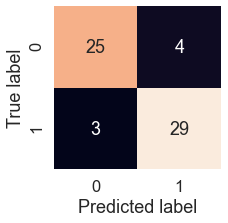

In [53]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix using seaborns heatmap
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(y_test, y_preds)

* Now we've got ROC curve, AUC metric and confusion matrix
* lets get a classification report, cross-validated precision, recall, and f1

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall, and f1 of our model
using cross validation, well be using `cross_val_score()`.

In [55]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# create a new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [57]:
# cross validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [58]:
# cross validated precision

cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [59]:
# cross validated recall

cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [60]:
# cross validated f1

cv_f1 = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

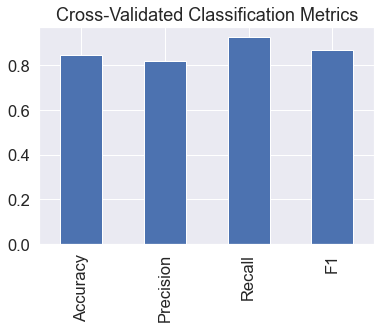

In [61]:
# visualize our cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                     legend=False);

### Feature Importance

Feature Importance is another way of asking,

**"Which features contributed most to the outcomes of the model and
how did they contribute?"**

Finding feature importance is different for each ML model. One way to find feature importance is to **Google Search** `(Model Name) feature importance`

in our case **LogisticRegression feature importance**

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# how to find feature importance using logistic regression (Google Search)

In [64]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [65]:
# check coef_ (coefficient)
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [66]:
# match/map coef's features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

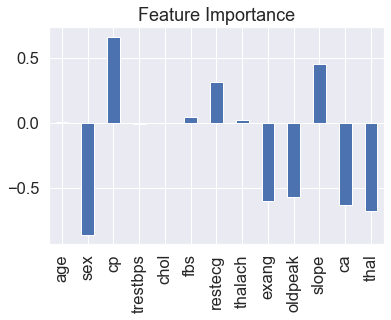

In [67]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [68]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you havent reached you Evaluation metric... ask yourself

* Could you collect more data?
* Could you try a better model? CatBoost or XGBoost?
* Could you improve the current model? (beyond what weve done so far)
* If your model is good enough (you hit your evaluation metric), how would you export it?